In [1]:
import os                                                 # to set current working directory 
from sklearn.decomposition import PCA                     # PCA program from scikit learn (package for machine learning)
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot                         # matrix scatter plots
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
import seaborn as sns

In [2]:
df=pd.read_csv("unconv_MV_v2.csv")
df

,Sample,Por,LogPerm,AI,Brittle,TOC,VR,Production,Prod2Scaled
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958,1897.657798
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778,2745.732996
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583,5835.130524
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629,2132.237219
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919,6282.254735
...,...,...,...,...,...,...,...,...,...
995,996,17.99,2.29,3.38,44.32,0.98,2.08,4211.527806,5230.433447
996,997,12.12,0.82,3.52,57.07,-0.04,1.73,1560.333735,2216.536779
997,998,15.55,1.50,2.48,58.25,1.89,2.35,2858.180459,3793.873108
998,999,20.89,2.02,3.23,46.17,1.71,2.27,6934.576348,7754.889551


In [3]:
df = df.iloc[:,1:9]                             # copy all rows and columns 1 through 8, note 0 column is removed
df.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.70000
Brittle,1000.0,49.769980,14.944955,3.030000,39.722500,49.680000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.640000,0.995000,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.64413
Prod2Scaled,1000.0,3237.154325,1507.552730,2.713535,2120.961071,2991.762748,4105.623405,12568.64413


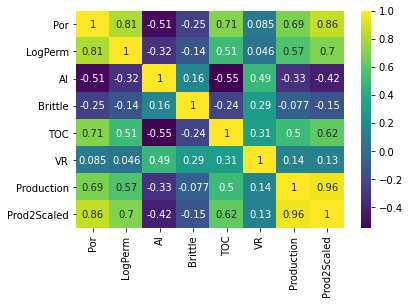

In [4]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [5]:
num = df._get_numeric_data()                         # get the numerical values
num[num < 0] = 0                                          # truncate negative values to 0.0
df.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.70000
Brittle,1000.0,49.769980,14.944955,3.030000,39.722500,49.680000,59.170000,93.47000
TOC,1000.0,1.006170,0.499838,0.000000,0.640000,0.995000,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.64413
Prod2Scaled,1000.0,3237.154325,1507.552730,2.713535,2120.961071,2991.762748,4105.623405,12568.64413


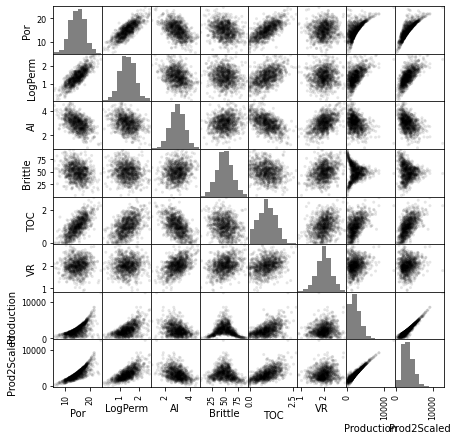

In [6]:
pd_plot.scatter_matrix(df, alpha = 0.1,              # pandas matrix scatter plot
    figsize=(7, 7),color = 'black', hist_kwds={'color':['grey']})
plt.show()

In [7]:
import ipywidgets as widgets
from ipywidgets import interactive, interact                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
import matplotlib.transforms as transforms
import math
from ipywidgets import VBox, HBox
from sklearn.preprocessing import StandardScaler



In [8]:
my_data_por_perm = df[["Por","TOC"]]                # extract just por and logperm, 100 samples
my_data_por_perm =my_data_por_perm.iloc[0:100]
features = ['Por','TOC']
x = my_data_por_perm.loc[:,features].values
s = StandardScaler()
s.fit(x)
x = s.transform(x)                     # standardize the data features to mean = 0, var = 1.0



In [21]:
global xdata
global ydata
def pc_slider(Angle):
    global xdata
    global ydata
    base = plt.gca().transData
    #print(base)
    rot = transforms.Affine2D().rotate_deg(int(Angle))
    line=plt.plot(x[:,0],x[:,1], 'o', transform= rot + base)
    xdata=x[:,0]*math.cos(math.radians(int(Angle)))-x[:,1]*math.sin(math.radians(int(Angle)))
    ydata=x[:,1]*math.cos(math.radians(int(Angle)))+x[:,0]*math.sin(math.radians(int(Angle)))
    
    plt.title("Chosen Angle for Data Set");plt.xlabel('Standardized Por'); plt.ylabel('Standardized TOC')

x1 = widgets.IntSlider(min=0, max = 180, value = 0, description = 'Angle',orientation='horizontal')
uik2 = widgets.VBox([x1],)
interactive_plot = widgets.interactive_output(pc_slider, {'Angle': x1})


In [22]:
display(uik2,interactive_plot)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 432x288 with 1 Axes>', 'i…

In [11]:
df2 = pd.DataFrame({'x':xdata, 'y':ydata})
data = df2.values


In [12]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(data)
print(np.round(pca.components_,3))
print('Variance explained by PC1 and PC2 =', np.round(pca.explained_variance_ratio_,3))

[[ 0.707  0.707]
 [-0.707  0.707]]
Variance explained by PC1 and PC2 = [0.86 0.14]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positiona

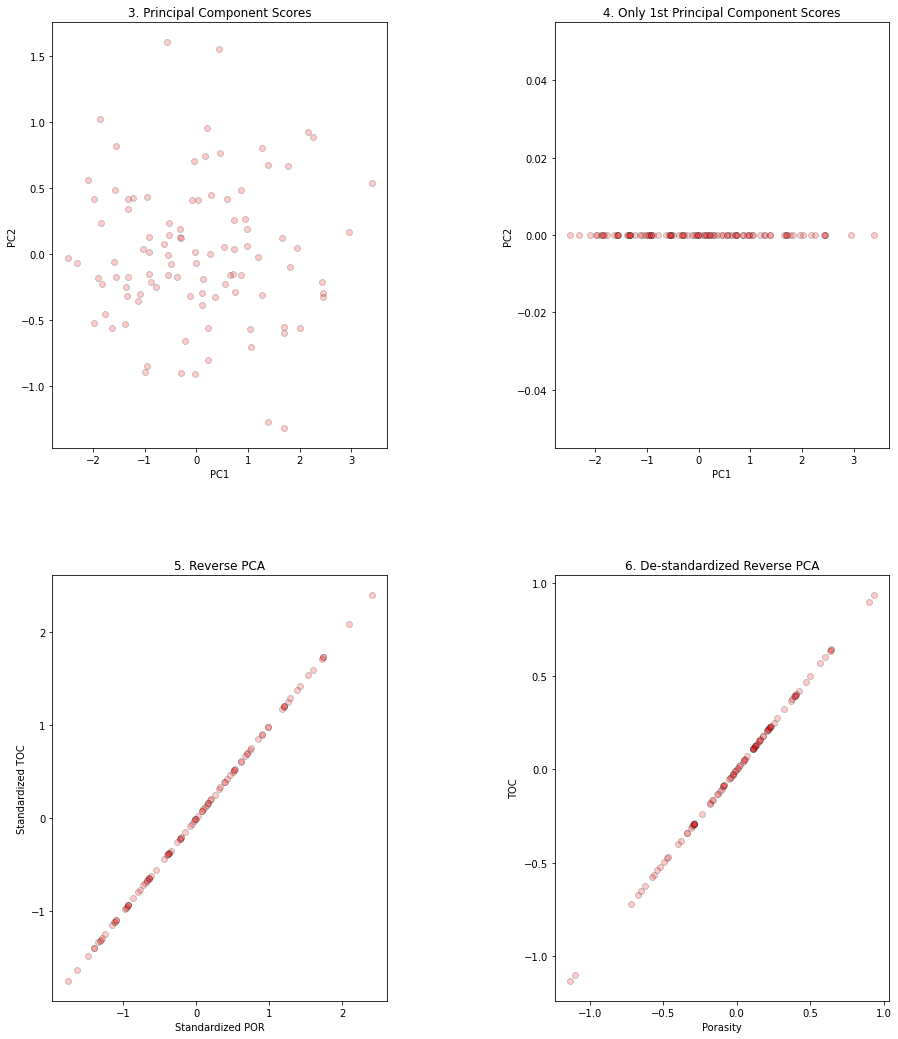

In [13]:
f, ( (ax203, ax204), (ax205, ax206)) = plt.subplots(2, 2,figsize=(15,18))
f.subplots_adjust(wspace=0.5,hspace = 0.3)
        
# ax201.scatter(my_data_por_perm[column1],my_data_por_perm[column2],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")    
# ax201.set_title('1. '+column2+' vs. '+column1); 
# ax201.set_xlabel(column1); ax201.set_ylabel(column2)
mu = np.mean(x, axis=0)
sd = np.std(x, axis=0)
x_stand = StandardScaler().fit_transform(data)                     # standardize the data features to mean = 0, var = 1.0

# ax202.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
# ax202.set_title('2. Standardized '+column2+' vs. '+column1); ax202.set_xlabel('Standardized '+column1); ax202.set_ylabel('Standardized '+column2)
nComp = 1

n_components = 2                                          # build principal component model with 2 components
pca = PCA(n_components=n_components)
pca.fit(data)

x_trans = pca.transform(data)                                # calculate principal component scores
ax203.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax203.set_title('3. Principal Component Scores'); ax203.set_xlabel('PC1'); ax203.set_ylabel('PC2')
xtrans2 = x_trans.copy()
x_trans[:,1] = 0.0                                         # zero / remove the 2nd principal component 

ax204.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax204.set_title('4. Only 1st Principal Component Scores'); ax204.set_xlabel('PC1'); ax204.set_ylabel('PC2')
xtrans2[:,0] = 0

xhat = pca.inverse_transform(x_trans)                             # reverse the principal component scores to standardized values
ax205.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax205.set_title('5. Reverse PCA'); 
ax205.set_xlabel('Standardized POR'); ax205.set_ylabel('Standardized TOC')

xhat = np.dot(pca.inverse_transform(data)[:,:nComp], pca.components_[:nComp,:])
xhat = sd*xhat + mu                                       # remove the standardization
    
    
ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax206.set_title('6. De-standardized Reverse PCA'); 
ax206.set_xlabel('Porosity'); ax206.set_ylabel('TOC')


plt.show()

In [14]:
 def pc_slider(X, Y):
    nComp = 1
    f, ((ax201,ax202), (ax203, ax204), (ax205, ax206)) = plt.subplots(3, 2,figsize=(10,13))
    f.subplots_adjust(wspace=0.5,hspace = 0.3)

    ax201.scatter(my_data_por_perm['Por'],my_data_por_perm['TOC'],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")    
    ax201.set_title('Porosity vs. TOC'); 
    ax201.set_xlabel("Porosity"); ax201.set_ylabel("TOC")
    features = ['Por','TOC']
    
    mu = np.mean(x, axis=0)
    sd = np.std(x, axis=0)
    x_stand = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0
    temp = np.array([float(X), float(Y)])
    temp=temp.reshape(-1, 2)
    temp=s.transform(temp)
    

    ax202.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax202.set_title('2. Standardized Por vs TOC'); ax202.set_xlabel('Standardized Porosity'); ax202.set_ylabel('Standardized TOC')
    

    n_components = 2                                          # build principal component model with 2 components
    pca = PCA(n_components=n_components)
    pca.fit(x)

    x_trans = pca.transform(data)                                # calculate principal component scores
    ax203.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax203.set_title('3. Principal Component Scores'); ax203.set_xlabel('PC1'); ax203.set_ylabel('PC2')
    x_trans[:,1] = 0.0                                         # zero / remove the 2nd principal component 

    ax204.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax204.set_title('4. Only 1st Principal Component Scores'); ax204.set_xlabel('PC1'); ax204.set_ylabel('PC2')

    xhat = pca.inverse_transform(x_trans)                             # reverse the principal component scores to standardized values
    ax205.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax205.set_title('5. Reverse PCA'); 
    ax205.set_xlabel('Standardized POR'); ax205.set_ylabel('Standardized TOC')

                        
    xhat = np.dot(pca.inverse_transform(x)[:,:nComp], pca.components_[:nComp,:])
    xhat = sd*xhat + mu                                       # remove the standardization
    
    xhat2 = np.dot(pca.inverse_transform(temp)[:,:nComp], pca.components_[:nComp,:])
    xhat2 = sd*xhat2 + mu  
    

    ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax206.set_title('6. De-standardized Reverse PCA');
    ax206.set_xlabel('Porosity'); ax206.set_ylabel('TOC')

    
    ax201.plot(float(X),float(Y), "ob")
    ax206.plot(xhat2[:,0],xhat2[:,1], "ob")
    
interactive_output=interactive(pc_slider,X=(5,25), Y=(0,3,.1), continuous_update=False)
output = interactive_output.children[-1]
output.layout.height = '1200px'
plt.show()

In [15]:
var_por = np.var(my_data_por_perm['Por'])
var_por_hat = np.var(xhat[:,0])
var_logperm = np.var(my_data_por_perm['TOC'])
var_logperm_hat = np.var(xhat[:,1])

print('Variance '+'Por'+' = ',np.round(var_por,3),', Variance Reduced Dimensional '+'Por'+' =',np.round(var_por_hat,3),'Fraction = ',np.round(var_por_hat/var_por,3))
print('Variance '+'TOC'+' =',np.round(var_por,3),', Variance Reduced Dimensional '+'TOC'+' =',np.round(var_logperm_hat,3),'Fraction = ',np.round(var_logperm_hat/var_logperm,3))



Variance Por =  7.89 , Variance Reduced Dimensional Por = 0.14 Fraction =  0.018
Variance TOC = 7.89 , Variance Reduced Dimensional TOC = 0.14 Fraction =  0.527


In [16]:
interactive_output

interactive(children=(IntSlider(value=15, description='X', max=25, min=5), FloatSlider(value=1.0, description=…

In [ ]:
def firstvariable(column1="Por",
                 column2="LogPerm"):
    my_data_por_perm = df[[column1,column2]]                
    my_data_por_perm =my_data_por_perm.iloc[0:100]
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(my_data_por_perm[column1], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
    ax1.set_title(column1)
    ax2.hist(my_data_por_perm[column2], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
    ax2.set_title(column2)
    plt.show()
    
    #sns.scatterplot(x=my_data_por_perm[column1],y=my_data_por_perm[column2],data=my_data_por_perm)

    features = [column1,column2]
    x = my_data_por_perm.loc[:,features].values
    mu = np.mean(x, axis=0)
    sd = np.std(x, axis=0)
    x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

    print("Original Mean "+column1+' = ', np.round(mu[0],2), ', Original Mean '+column2+' = ', np.round(mu[1],2)) 
    print("Original StDev "+column1+' = ', np.round(sd[0],2), ', Original StDev '+column2+' = ', np.round(sd[1],2)) 
    print('Mean Transformed '+column1+' = ',np.round(np.mean(x[:,0]),2),', Mean Transformed '+column2+' = ',np.round(np.mean(x[:,1]),2))
    print('Variance Transformed '+column1+' = ',np.var(x[:,0]),', Variance Transformed '+column2+' = ',np.var(x[:,1]))
    
#     f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#     ax1.hist(x[:,0], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
#     ax1.set_title('Standardized '+column1)
#     ax2.hist(x[:,1], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
#     ax2.set_title('Standardized '+column2)
#     plt.show()
    
#     plt.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     plt.title('Standardized '+column1+' vs '+column2); plt.xlabel('Standardized '+column1); plt.ylabel('Standardized '+column2)
#     plt.show()
    n_components = 2
    pca = PCA(n_components=n_components)
    pca.fit(x)
    print(np.round(pca.components_,3))
    print('Variance explained by PC1 and PC2 =', np.round(pca.explained_variance_ratio_,3))
    
    
    f, (ax101, ax102, ax103) = plt.subplots(1, 3,figsize=(12,3))
    f.subplots_adjust(wspace=0.7)

    ax101.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax101.set_title('Standardized '+column2+' vs. '+column1); ax101.set_xlabel('Standardized '+column1); ax101.set_ylabel('Standardized '+column2)

    x_trans = pca.transform(x)                                # calculate the principal component scores
    ax102.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax102.set_title('Principal Component Scores'); ax102.set_xlabel('PC1'); ax102.set_ylabel('PC2')

    x_reverse = pca.inverse_transform(x_trans)                        # reverse the principal component scores to standardized values
    ax103.scatter(x_reverse[:,0],x_reverse[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax103.set_title('Reverse PCA'); ax103.set_xlabel('Standardized '+column1); ax103.set_ylabel('Standardized '+column2)
    plt.show()
    
    nComp = 1

#     f, ((ax201, ax202), (ax203, ax204), (ax205, ax206)) = plt.subplots(3, 2,figsize=(15,18))
#     f.subplots_adjust(wspace=0.5,hspace = 0.3)
    

   
#     ax201.scatter(my_data_por_perm[column1],my_data_por_perm[column2],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax201.set_title('1. '+column2+' vs. '+column1); ax201.set_xlabel(column1); ax201.set_ylabel(column2)


    mu = np.mean(x, axis=0)
    sd = np.std(x, axis=0)
    x_stand = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

#     ax202.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax202.set_title('2. Standardized '+column2+' vs. '+column1); ax202.set_xlabel('Standardized '+column1); ax202.set_ylabel('Standardized '+column2)

    n_components = 2                                          # build principal component model with 2 components
    pca = PCA(n_components=n_components)
    pca.fit(x)

    x_trans = pca.transform(x)                                # calculate principal component scores
#     ax203.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax203.set_title('3. Principal Component Scores'); ax203.set_xlabel('PC1'); ax203.set_ylabel('PC2')

    x_trans[:,1] = 0.0                                         # zero / remove the 2nd principal component 

#     ax204.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax204.set_title('4. Only 1st Principal Component Scores'); ax204.set_xlabel('PC1'); ax204.set_ylabel('PC2')

    xhat = pca.inverse_transform(x_trans)                             # reverse the principal component scores to standardized values
#     ax205.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax205.set_title('5. Reverse PCA'); ax205.set_xlabel('Standardized '+column1); ax205.set_ylabel('Standardized '+column2)

    xhat = np.dot(pca.inverse_transform(x)[:,:nComp], pca.components_[:nComp,:])
    xhat = sd*xhat + mu                                       # remove the standardization
     
    
    
#     ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax206.set_title('6. De-standardized Reverse PCA'); ax206.set_xlabel(column1); ax206.set_ylabel(column2)

#     plt.show()
    f, (ax201, ax206) = plt.subplots(1, 2,figsize=(15,6))
    f.subplots_adjust(wspace=0.5,hspace = 0.3)
    
    ax201.scatter(my_data_por_perm[column1],my_data_por_perm[column2],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax201.set_title('1. '+column2+' vs. '+column1); ax201.set_xlabel(column1); ax201.set_ylabel(column2)

    ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax206.set_title('6. De-standardized Reverse PCA'); ax206.set_xlabel(column1); ax206.set_ylabel(column2)
    
          
#         pd_plot.scatter_matrix(df_dim[PCs-1], alpha = 0.1,                # pandas matrix scatter plot
#         figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
#         plt.suptitle(str(PCs)+' Principle Components')
#         n_components = PCs
#         pca_f7 = PCA(n_components=n_components)
#         pca_f7.fit(x_f7)
#         labels = 'Variance Explained', 'Variance Missing'
#         sizes = []
#         sizes.append(sum(np.round(pca_f7.explained_variance_ratio_,3)))
#         sizes.append(1-sum(np.round(pca_f7.explained_variance_ratio_,3)))
#         fig1, ax1 = plt.subplots()
#         ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
#                 shadow=True, startangle=90)
#         ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.show()

    var_por = np.var(my_data_por_perm[column1]); var_por_hat = np.var(xhat[:,0]);
    var_logperm = np.var(my_data_por_perm[column2]); var_logperm_hat = np.var(xhat[:,1]);
    print('Variance '+column1+' = ',np.round(var_por,3),', Variance Reduced Dimensional '+column1+' =',np.round(var_por_hat,3),'Fraction = ',np.round(var_por_hat/var_por,3))
    print('Variance '+column2+' =',np.round(var_por,3),', Variance Reduced Dimensional '+column2+' =',np.round(var_logperm_hat,3),'Fraction = ',np.round(var_logperm_hat/var_logperm,3))

    global my_data_f7
    my_data_f7=df.copy(deep=True)
    
    np.set_printoptions(suppress=True)
    features = ['Por','LogPerm','AI','Brittle','TOC','VR',"Production"]
    x_f7 = my_data_f7.loc[:,features].values
    mu_f7 = np.mean(x_f7, axis=0)
    sd_f7 = np.std(x_f7, axis=0)
    x_f7 = StandardScaler().fit_transform(x_f7)

    print("Original Means = ", features[:], np.round(mu_f7[:],2)) 
    print("Original StDevs = ", features[:],np.round(sd_f7[:],2)) 
    print('Mean Transformed = ',features[:],np.round(x.mean(axis=0),2))
    print('Variance Transformed = ',features[:],np.round(x.var(axis=0),2))
    
    n_components = 7
    pca_f7 = PCA(n_components=n_components)
    pca_f7.fit(x_f7)
    print('\n\nVariance explained by PC1 thru PC7 =', np.round(pca_f7.explained_variance_ratio_,3))
    fig5 = plt.figure()
    ax = fig5.add_axes([0,0,1,1])
    langs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
    ax.bar(langs,np.round(pca_f7.explained_variance_ratio_,3))
    
    nComp=7
    x_hat_dim=[]
    while nComp >=1: 
        temp_xhat_dim = np.dot(pca_f7.transform(x_f7)[:,:nComp], pca_f7.components_[:nComp,:])
        temp_xhat_dim= sd_f7*temp_xhat_dim + mu_f7
        nComp-=1
        x_hat_dim.append(temp_xhat_dim)



    f, axes2 = plt.subplots(1, 8, figsize=(20,20))
    f.subplots_adjust(wspace=0.7)
    columns=['Std. Porosity','Std. Log[Perm.]','Std. Acoustic Imped.','Std. Brittleness','Std. Total Organic C', 'Std. Vit. Reflectance', 'Std. Production']
    axes2[0].scatter(my_data_f7[column1],my_data_f7[column2],s=None, c="red",marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    axes2[0].set_title('Original Data'); axes2[0].set_xlabel(column1); axes2[0].set_ylabel(column2)
    axes2[0].set_ylim(0.0,3.0); axes2[0].set_xlim(8,22); axes2[0].set_aspect(4.0); 
    i=1
    title=['7 Principal Component','6 Principal Components', '5 Principal Components','4 Principal Components', '3 Principal Components', '2 Principal Components', '1 Principal Components' ]
    while i<len(axes2):
           axes2[i].scatter(x_hat_dim[i-1][:,0],x_hat_dim[i-1][:,4],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
           axes2[i].set_title(title[i-1]); axes2[i].set_xlabel(column1); axes2[i].set_ylabel(column2)
           axes2[i].set_ylim(0.0,3.0); axes2[i].set_xlim(8,22); axes2[i].set_aspect(4.0)
           i+=1
    plt.show()

    i=len(x_hat_dim)-1
    while i>=0:
        print(title[i]+': Variance '+column1+' = ',np.round(np.var(x_hat_dim[i][:,0])/(sd_f7[0]*sd_f7[0]),2),' Variance '+column2+' = ',np.round(np.var(x_hat_dim[i][:,4])/(sd_f7[4]*sd_f7[4]),2))
        i-=1

    global df_dim
    df_dim=[]
    i=len(x_hat_dim)-1
    while i>=0:
        df_1d = pd.DataFrame(data=x_hat_dim[i],columns=features)  
        i-=1
        df_dim.append(df_1d)
        
#     pd_plot.scatter_matrix(my_data_f7.drop('Prod2Scaled',axis=1), alpha = 0.1,           # pandas matrix scatter plot
#     figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
#     plt.suptitle('Original Data')
#     def pc_slider(PCs):
#         pd_plot.scatter_matrix(df_dim[PCs-1], alpha = 0.1,                # pandas matrix scatter plot
#         figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
#         plt.suptitle(str(PCs)+' Principle Components')
#     interact(pc_slider,PCs=(1,7))


interact(firstvariable,column1=["Por", "LogPerm","AI", "Brittle","TOC","VR"],column2=["Por", "LogPerm","AI", "Brittle","TOC","VR"])

plt.show()

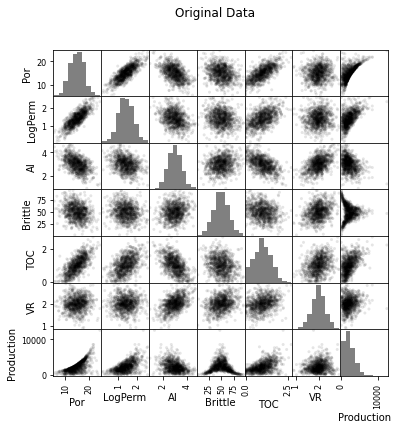

interactive(children=(IntSlider(value=4, description='PCs', max=7, min=1), Output()), _dom_classes=('widget-in…

In [24]:
pd_plot.scatter_matrix(my_data_f7.drop('Prod2Scaled',axis=1), alpha = 0.1,           # pandas matrix scatter plot
figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
features = ['Por','LogPerm','AI','Brittle','TOC','VR',"Production"]
x_f7 = my_data_f7.loc[:,features].values
plt.suptitle('Original Data')
x_f7 = StandardScaler().fit_transform(x_f7)
def pc_slider(PCs):
    pd_plot.scatter_matrix(df_dim[PCs-1], alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
    plt.suptitle(str(PCs)+' Principle Components')
    n_components = PCs
    pca_f7 = PCA(n_components=n_components)
    pca_f7.fit(x_f7)
    labels = 'Variance Explained', 'Variance Missing'
    sizes = []
    sizes.append(sum(np.round(pca_f7.explained_variance_ratio_,3)))
    sizes.append(1-sum(np.round(pca_f7.explained_variance_ratio_,3)))
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
_=interact(pc_slider,PCs=(1,7), continuous_update=False)